# Simulating the growth of a colony

We demonstrate here a simple `COMETS` simulation with space, the growth of an *E. coli* colony using a 2D spatial lattice.

In [1]:
import comets as c
import os
import pandas as pd
pd.options.display.max_rows = 10

As usual, we first create a parameters object using the `params` class.

In [2]:
my_params = c.params()
my_params.all_params['maxCycles'] = 300
my_params.all_params['writeBiomassLog'] = True

We next load a layout for our simulation 

In [3]:
my_layout = c.layout('test_colony/colony_layout')
my_layout.initial_pop

[[10.0, 10.0, 1e-07]]

In [4]:
# create comets object from the loaded parameters and layout 
my_comets = c.comets(my_layout, my_params)

# run comets simulation
my_comets.run()


Running COMETS simulation ...
Done!


We can print the stderr and stdout, which are stored in the `run_errors` and `run_output` fields:

In [5]:
print(my_comets.run_errors)

STDERR empty.


And here is how our incipient *E. coli* colony looks like: 

In [6]:
import numpy as np

biomass_END = np.zeros((my_layout.grid[0], my_layout.grid[1]))

aux = my_comets.biomass.loc[my_comets.biomass['Cycle'] == 300]
for index, row in aux.iterrows():
    biomass_END[row['x'], row['y']] = row['biomass']

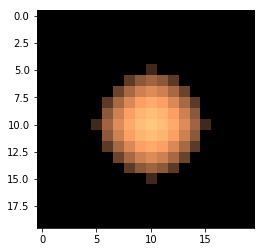

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm, matplotlib.colors
import copy

my_cmap = copy.copy(matplotlib.cm.get_cmap('copper')) # copy the default cmap
my_cmap.set_bad((0,0,0))

plt.imshow(biomass_END, interpolation='nearest', 
           norm=matplotlib.colors.LogNorm(), cmap=my_cmap)